In [1]:
%load_ext autoreload
%autoreload 2

# Pair rule gene alignment

In [21]:
from utils.dataset import *
import matplotlib.pyplot as plt
from torchvision.transforms import Compose

transform = Compose([
    Reshape2DField(),
])

vel = AtlasDataset('WT', 'Runt', 'velocity2D', transform=Reshape2DField())
rnt = AtlasDataset('WT', 'Runt', 'raw2D', transform=transform)
eve = AtlasDataset('WT', 'Even_Skipped-YFP', 'raw2D', transform=transform, drop_time=True)
ftz = AtlasDataset('WT', 'Fushi_Tarazu', 'raw2D', transform=transform)
slp = AtlasDataset('WT', 'Sloppy_Paired', 'raw2D', transform=transform)
prd = AtlasDataset('WT', 'Paired', 'raw2D', transform=transform)
trt = AtlasDataset('WT', 'Tartan', 'raw2D', transform=transform)


dataset = JointDataset([
    ('rnt', rnt),
    ('eve', eve),
    ('ftz', ftz),
    ('slp', slp),
    ('prd', prd),
    ('trt', trt),
    ('vel', vel),
], live_key='vel', ensemble=1)
dataset.df

100%|██████████| 1/1 [00:00<00:00, 585.14it/s]


folder  \
0     /project/vitelli/jonathan/REDO_fruitfly/flydri...   
1     /project/vitelli/jonathan/REDO_fruitfly/flydri...   
2     /project/vitelli/jonathan/REDO_fruitfly/flydri...   
3     /project/vitelli/jonathan/REDO_fruitfly/flydri...   
4     /project/vitelli/jonathan/REDO_fruitfly/flydri...   
...                                                 ...   
1377  /project/vitelli/jonathan/REDO_fruitfly/flydri...   
1378  /project/vitelli/jonathan/REDO_fruitfly/flydri...   
1379  /project/vitelli/jonathan/REDO_fruitfly/flydri...   
1380  /project/vitelli/jonathan/REDO_fruitfly/flydri...   
1381  /project/vitelli/jonathan/REDO_fruitfly/flydri...   

                                           tiff      embryoID       time  \
0     MAX_Cyl1_2_000000_c1_rot_scaled_view1.tif  202001150004 -19.000000   
1     MAX_Cyl1_2_000000_c1_rot_scaled_view1.tif  202001150004 -18.000000   
2     MAX_Cyl1_2_000000_c1_rot_scaled_view1.tif  202001150004 -17.000000   
3     MAX_Cyl1_2_000000_c1_rot_scaled_view1.tif  202001150004 -16.000000   
4     MAX_Cyl1_2_000000_c1_rot_scaled_view1.tif  202001150004 -15.000000   
...                                         ...           ...        ...   
1377  MAX_Cyl1_2_000000_c1_rot_scaled_view1.tif  202001141943  49.609360   
1378  MAX_Cyl1_2_000000_c1_rot_scaled_view1.tif  202001141943  51.183102   
1379  MAX_Cyl1_2_000000_c1_rot_scaled_view1.tif  202001141943  52.853797   
1380  MAX_Cyl1_2_000000_c1_rot_scaled_view1.tif  202001141943  54.638666   
1381  MAX_Cyl1_2_000000_c1_rot_scaled_view1.tif  202001141943  56.600115   

      eIdx  key  dataset_idx  merged_index  
0        0  rnt            0            -1  
1        1  rnt            0            -1  
2        2  rnt            0            -1  
3        3  rnt            0            -1  
4        4  rnt            0            -1  
...    ...  ...          ...           ...  
1377    17  vel            6           134  
1378    18  vel            6           135  
1379    19  vel            6           136  
1380    20  vel            6           137  
1381    21  vel            6           138  

[1382 rows x 8 columns]

In [22]:
dataset.values.keys()

dict_keys([202001150004, 202001142033, 202001141730, 202001210044, 202001210000, 202001141943, 202001201216, 202001201716, -1])

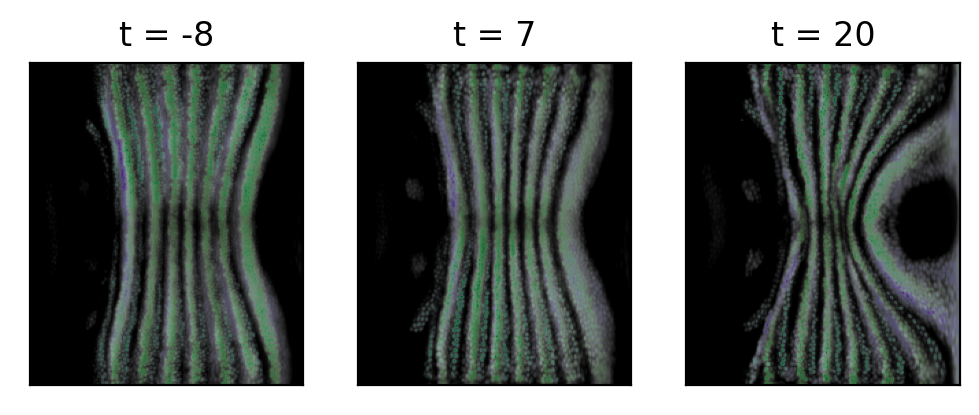

In [24]:
from utils.plot_utils import *
fig, ax = plt.subplots(1, 3, dpi=200)

colors = {
    'rnt': 'Purples',
    #'eve': 'Oranges',
    #'trt': 'Reds',
    'ftz': 'Greens',
    #'slp': 'Blues',
    'prd': 'BuGn',
}
for i, idx in enumerate([5, 20, 30]):
    batch = dataset[idx]
    for key in colors:
        field = batch[key][0] - np.median(batch[key][0])
        field[field < 0] = 0
        field /= np.ptp(field)
        ax[i].imshow(field, cmap=colors[key], alpha=field, extent=[ap_min, ap_max, dv_min, dv_max])
    ax[i].set_facecolor('black')
    ax[i].set(xticks=[], yticks=[])
    ax[i].set(xlim=[ap_min, ap_max], ylim=[dv_min, dv_max])
    ax[i].set(aspect='equal')
    ax[i].set_title('t = %d' % batch['time'])
    

In [28]:
%load_ext autoreload
%autoreload 2

from utils.dataset import *
import matplotlib.pyplot as plt
from torchvision.transforms import Compose

transform = Compose([
    Reshape2DField(),
    ToTensor(),
])

vel = AtlasDataset('WT', 'Runt', 'velocity2D', transform=transform, tmin=-10, tmax=40)
rnt = AtlasDataset('WT', 'Runt', 'raw2D', transform=transform, tmin=-10, tmax=40)
print(rnt.df.loc[rnt.df.embryoID == 202001210044, 'time'].values)
print(rnt.df.loc[vel.df.embryoID == 202001210044, 'time'].values)

dataset = TrajectoryDataset([
    ('rnt', rnt),
    ('vel', vel),
], live_key='vel')

loader = torch.utils.data.DataLoader(dataset, num_workers=2)
from tqdm import tqdm
for batch in tqdm(loader):
    pass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


100%|██████████| 6/6 [00:00<00:00, 576.67it/s]


[-6.97598863 -5.98184142 -5.12009921 -4.17383763 -3.24406093 -2.32365025
 -1.40436704 -0.50285658  0.40967095  1.29308019  2.18897606  3.08051842
  3.99624993  4.9288938   5.91336789  6.97892234  8.15063068  9.46746694
 10.9292666  12.46870406 14.05105978 15.48244885 16.76066569 17.90306537
 18.94254957 19.89324707 20.7997394  21.72140055 22.57320456 23.49713311
 24.79276559 25.35315831 26.19706056 27.08038473 27.98229783 28.87278061
 29.70505592 30.45929449 31.26473627 31.96409464 32.72579254 33.39169607
 34.15360158 34.81798897 35.55553675 36.28139792 37.05166798 37.87484034
 38.73754045 39.62194069]
[-6.97598863 -5.98184142 -5.12009921 -4.17383763 -3.24406093 -2.32365025
 -1.40436704 -0.50285658  0.40967095  1.29308019  2.18897606  3.08051842
  3.99624993  4.9288938   5.91336789  6.97892234  8.15063068  9.46746694
 10.9292666  12.46870406 14.05105978 15.48244885 16.76066569 17.90306537
 18.94254957 19.89324707 20.7997394  21.72140055 22.57320456 23.49713311
 24.79276559 25.35315831 

100%|██████████| 217/217 [00:01<00:00, 137.11it/s]


In [19]:
dataset.df[dataset.df.embryoID == 202001210044].drop(['folder', 'tiff'], axis=1).tail(50)

embryoID  time  eIdx  key  dataset_idx  merged_index  max_len  \
328  202001210044    -7     0  vel            1           171       49   
329  202001210044    -6     1  vel            1           172       48   
330  202001210044    -5     2  vel            1           173       47   
331  202001210044    -4     3  vel            1           174       46   
332  202001210044    -3     4  vel            1           175       45   
333  202001210044    -2     5  vel            1           176       44   
334  202001210044    -1     6  vel            1           177       43   
335  202001210044    -1     7  vel            1           177       42   
336  202001210044     0     8  vel            1           178       41   
337  202001210044     1     9  vel            1           179       40   
338  202001210044     2    10  vel            1           180       39   
339  202001210044     3    11  vel            1           181       38   
340  202001210044     4    12  vel            1           182       37   
341  202001210044     5    13  vel            1           183       36   
342  202001210044     6    14  vel            1           184       35   
343  202001210044     7    15  vel            1           185       34   
344  202001210044     8    16  vel            1           186       33   
345  202001210044     9    17  vel            1           187       32   
346  202001210044    11    18  vel            1           188       31   
347  202001210044    12    19  vel            1           189       30   
348  202001210044    14    20  vel            1           190       29   
349  202001210044    15    21  vel            1           191       28   
350  202001210044    17    22  vel            1           192       27   
351  202001210044    18    23  vel            1           193       26   
352  202001210044    19    24  vel            1           194       25   
353  202001210044    20    25  vel            1           195       24   
354  202001210044    21    26  vel            1           196       23   
355  202001210044    22    27  vel            1           197       22   
356  202001210044    23    28  vel            1           198       21   
357  202001210044    23    29  vel            1           198       20   
358  202001210044    25    30  vel            1           199       19   
359  202001210044    25    31  vel            1           199       18   
360  202001210044    26    32  vel            1           200       17   
361  202001210044    27    33  vel            1           201       16   
362  202001210044    28    34  vel            1           202       15   
363  202001210044    29    35  vel            1           203       14   
364  202001210044    30    36  vel            1           204       13   
365  202001210044    30    37  vel            1           204       12   
366  202001210044    31    38  vel            1           205       11   
367  202001210044    32    39  vel            1           206       10   
368  202001210044    33    40  vel            1           207        9   
369  202001210044    33    41  vel            1           207        8   
370  202001210044    34    42  vel            1           208        7   
371  202001210044    35    43  vel            1           209        6   
372  202001210044    36    44  vel            1           210        5   
373  202001210044    36    45  vel            1           210        4   
374  202001210044    37    46  vel            1           211        3   
375  202001210044    38    47  vel            1           212        2   
376  202001210044    39    48  vel            1           213        1   
377  202001210044    40    49  vel            1           214        0   

     sequence_index  
328             161  
329             162  
330             163  
331             164  
332             165  
333             166  
334             167  
335             167  
336             168  
337           

In [9]:
dataset.values[202001210044]['vel'].shape, dataset.values[202001210044]['rnt'].shape

((88, 2, 236, 200), (88, 236, 200))

# Curated myosin datasets

(57, 256, 218, 2, 2)
(79, 2, 2, 236, 200)
(57, 256, 218, 2, 2)
(75, 2, 2, 236, 200)


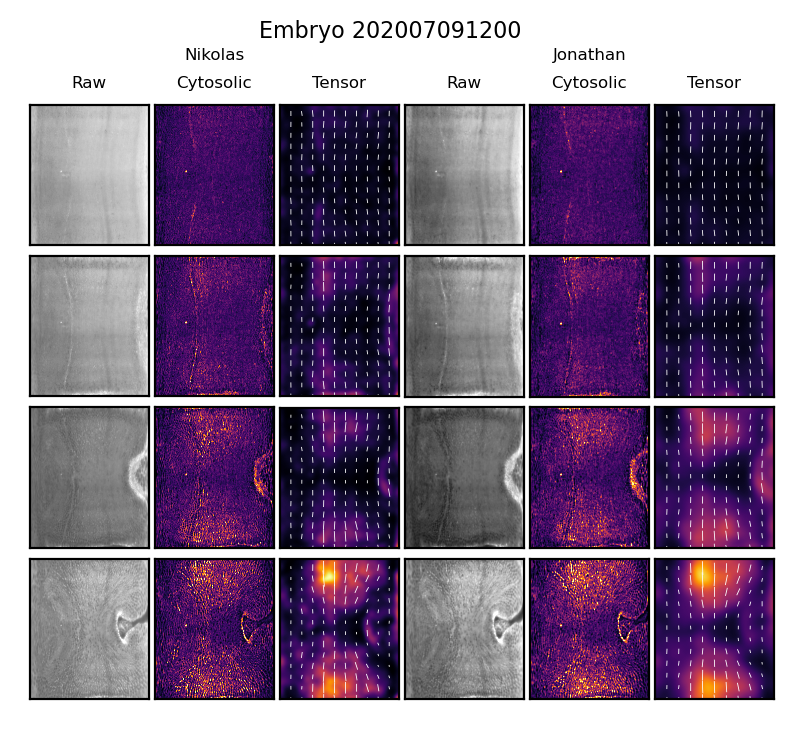

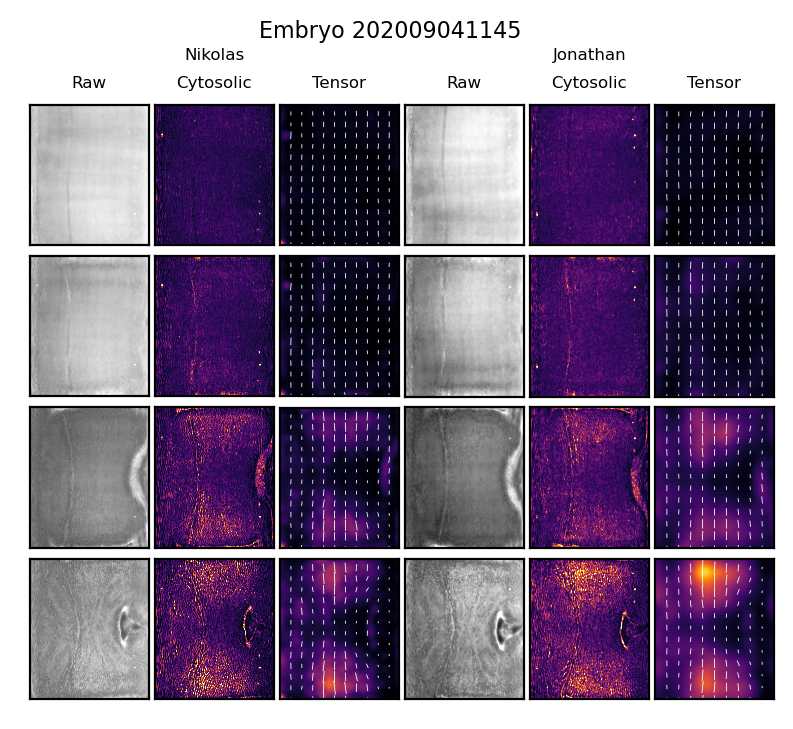

In [95]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import glob
from utils.plot_utils import *
plt.rcParams['image.cmap'] = 'inferno'
plt.rcParams['image.origin'] = 'lower'
plt.rcParams['figure.titlesize'] = 8
plt.rcParams['axes.titlesize'] = 6
plt.rcParams['axes.labelsize'] = 6
plt.rcParams['figure.dpi'] = 200


nikolas_dir = '../nikolas_data/WT myosin datasets for Jonathan/'
jonathan_dir = 'Public/Halo_Hetero_Twist[ey53]_Hetero/Sqh-GFP'

eIds = ['202007091200', '202009041145']
offsets = [10, 0]

dt = 10
N = 4

for i, eId in enumerate(eIds):
    fig, ax = plt.subplots(N, 6, figsize=(6*0.8, N))

    raw_nik = Image.open(glob.glob(os.path.join(nikolas_dir, 'individual movies', eId+'_twistPlus_*.tif'))[0])
    cyt_nik = Image.open(os.path.join(nikolas_dir, 'individual movies', eId+'_cytosolic.tif'))
    ten_nik = np.load(os.path.join(nikolas_dir, 'individual movies', eId+ '_myosin.npy'), mmap_mode='r')
    
    raw_jon = np.load(os.path.join(jonathan_dir, eId, 'raw2D.npy'), mmap_mode='r')
    cyt_jon = np.load(os.path.join(jonathan_dir, eId, 'cyt2D.npy'), mmap_mode='r')
    ten_jon = np.load(os.path.join(jonathan_dir, eId, 'tensor2D.npy'), mmap_mode='r')
    
    cmin = np.median(cyt_jon) - np.std(cyt_jon)
    cmax = cmin + 5 * np.std(cyt_jon)
    
    dev = ten_jon - np.einsum('tkkyx,ij->tijyx', ten_jon, np.eye(2))
    mnorm = np.linalg.norm(dev, axis=(1, 2))
    mmin = np.min(mnorm)
    mmax = np.max(mnorm)
    
    offset = offsets[i]

    print(ten_nik.shape)
    print(ten_jon.shape)
    for i in range(N):
        raw_nik.seek(i*dt)
        raw = np.array(raw_nik)
        color_2D(ax[i, 0], raw, cmap='Greys_r', vmax_std=10)
        
        cyt_nik.seek(i*dt)
        cyt = np.array(cyt_nik)
        color_2D(ax[i, 1], cyt, vmax_std=1)
        
        tensor = ten_nik[dt*i].transpose(2, 3, 0, 1).copy()
        tensor = tensor[::-1, ::-1, :, :] #YX ordering
        tensor[0, 1] *= -1 #origin lower
        tensor[1, 0] *= -1 #origin lower
        plot_tensor2D(ax[i, 2], tensor)
        
        raw = raw_jon[i*dt+offset]
        color_2D(ax[i, 3], raw, cmap='Greys_r', vmax_std=10)
        
        cyt = cyt_jon[i*dt+offset]
        color_2D(ax[i, 4], cyt, vmin=cmin, vmax=cmax)

        tensor = ten_jon[i*dt+offset]
        plot_tensor2D(ax[i, 5], tensor, vmin=mmin, vmax=mmax)
        
        
    fig.text(0.5, 1.3, 'Nikolas', 
             fontsize=6,
             va='bottom', ha='center', 
             transform=ax[0, 1].transAxes)
    
    fig.text(0.5, 1.3, 'Jonathan', 
         fontsize=6,
         va='bottom', ha='center', 
         transform=ax[0, 4].transAxes)
        
    fig.suptitle('Embryo ' + eId)
    ax[0, 0].set_title('Raw')
    ax[0, 1].set_title('Cytosolic')
    ax[0, 2].set_title('Tensor')
    
    ax[0, 3].set_title('Raw')
    ax[0, 4].set_title('Cytosolic')
    ax[0, 5].set_title('Tensor')

    fig.subplots_adjust(hspace=0.01, wspace=0.05)


# Advected dorsal source

(36, 236, 200)


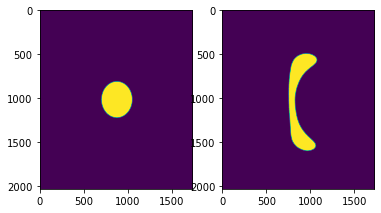

In [10]:
from PIL import Image
from skimage.transform import resize
from skimage.morphology import binary_dilation, binary_erosion

import numpy as np
import matplotlib.pyplot as plt

key='RECTANGLE'
key = 'ELLIPSE_A=0.5_B=0.25'
key = 'ELLIPSE_A=0.25_B=0.25'
key = 'CIRCLE_R=0.2'
base = 'dorsal_mask_%s_advected' % key
dorsal_mask = Image.open('Public/Masks/%s.tif' % base)

fig, ax = plt.subplots(1, 2)

mask = []
i = 0
while True:
    try:
        dorsal_mask.seek(i)
        mask.append(resize(np.array(dorsal_mask), (236, 200)))
        if i == 0:
            ax[0].imshow(dorsal_mask)
        i = i + 1
    except Exception as e:
        break

ax[1].imshow(dorsal_mask)
print(np.stack(mask).shape)
mask = np.stack(mask)
np.save('Public/Masks/%s_RESIZED.npy' % base, mask)

(36, 236, 200)


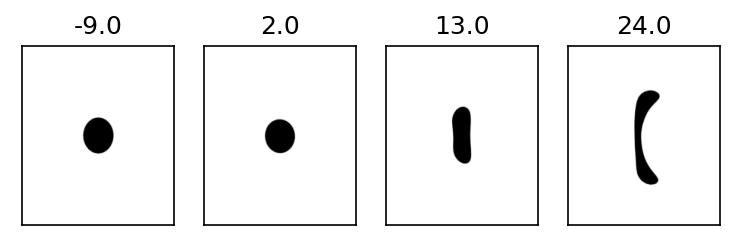

In [9]:
import numpy as np
import matplotlib.pyplot as plt
mask = np.load('Public/Masks/%s_RESIZED.npy' % base, mmap_mode='r')
time = np.load('Public/Masks/dorsal_mask_time.npy')
print(mask.shape)
fig, ax = plt.subplots(1, 4, dpi=150)
for i in range(4):
    ax[i].imshow(mask[i*11], cmap='Greys')
    ax[i].set(xticks=[], yticks=[], title=time[i*11])

# Posterior midgut + Cephallic furrow mask

attempt to seek outside sequence
(45, 236, 200)


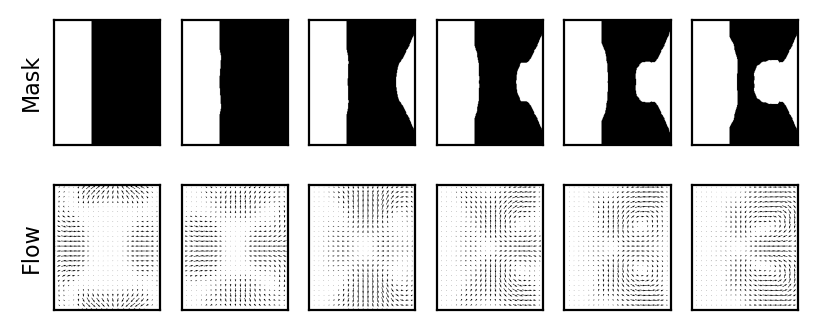

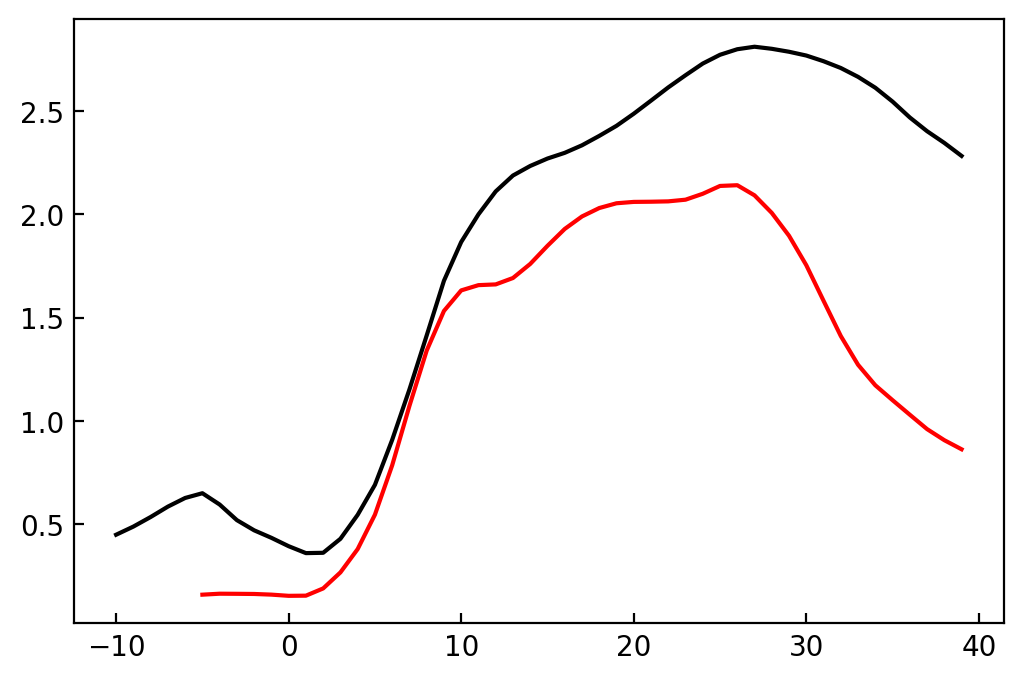

In [31]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['image.cmap'] = 'Greys'
plt.rcParams['axes.titlesize'] = 8
plt.rcParams['axes.labelsize'] = 8
plt.rcParams['figure.dpi'] = 200
plt.rcParams['image.origin'] = 'lower'

from PIL import Image
from skimage.transform import resize
from skimage.morphology import binary_dilation, binary_erosion
pmg_mask = Image.open('../nikolas_data/WT myosin datasets for Jonathan/ensemble/WT_PMG_mask.tif')
cf_mask = Image.open('../nikolas_data/WT myosin datasets for Jonathan/ensemble/WT_CF_mask.tif')
flow = np.load(os.path.join('../nikolas_data/WT myosin datasets for Jonathan/ensemble/WT_piv_ensemble.npy'), mmap_mode='r')

flow = flow.transpose(0, 3, 1, 2)
flow = flow[:, ::-1]
n = 3
i = 0
total_mask = []
while True:
    try:
        pmg_mask.seek(i)
        cf_mask.seek(i)
        mask = resize(np.array(pmg_mask), (236, 200)) + resize(np.array(cf_mask), (236, 200))
        mask = (mask + mask[::-1]) > 0
        total_mask.append(binary_dilation(mask, np.ones([n, n])))
        i += 1
    except Exception as e:
        print(e)
        break

total_mask = np.stack(total_mask)
total_mask = ~(np.cumsum(total_mask, axis=0) > 0)

print(total_mask.shape)
N = 6
fig, ax = plt.subplots(2, N, figsize=(N*0.8, 2))
d = 7
for i in range(N):
    im = ax[0, i].imshow(total_mask[i*d], vmin=0)
    plot_vector2D(ax[1, i], flow[i*d])

#plt.colorbar(im, ax=ax[0, -1])
for a in ax.flatten():
    a.set(xticks=[], yticks=[])
    a.set_aspect('equal')

ax[0, 0].set_ylabel('Mask')
ax[1, 0].set_ylabel('Flow')

fig, ax = plt.subplots(1, 1)
t = np.load('Public/WT/ECad-GFP/ensemble/t.npy')
v = np.load('Public/WT/ECad-GFP/ensemble/velocity2D.npy')
ax.plot(t, np.linalg.norm(v, axis=1).mean(axis=(1, 2)), color='black')

t = np.arange(flow.shape[0]) - 5
ax.plot(t, np.linalg.norm(flow, axis=1).mean(axis=(1, 2)), color='red')
    

np.save('Public/Masks/Dynamic_PMG_CF_mask', total_mask)
np.save('Public/Masks/Dynamic_PMG_CF_time', t)

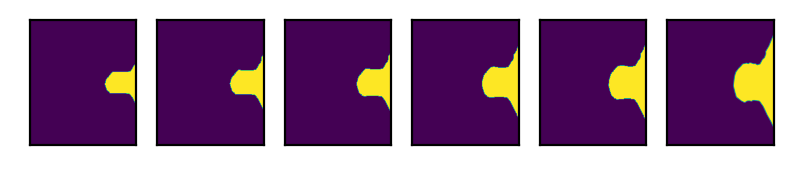

In [25]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['image.cmap'] = 'viridis'
plt.rcParams['axes.titlesize'] = 8
plt.rcParams['axes.labelsize'] = 8
plt.rcParams['figure.dpi'] = 200

from PIL import Image
from skimage.transform import resize
from skimage.morphology import binary_dilation, binary_erosion
pmg_mask = np.array(Image.open('Public/Masks/MAX_WT_PMG_mask.tif'))
pmg_mask = resize(pmg_mask, (236, 200))

N = 6
fig, ax = plt.subplots(1, N, figsize=(N*0.8, 1))
d = 5
for i in range(N-1):
    n = (N-i) * d
    ax[i].imshow(binary_erosion(pmg_mask, np.ones([n, n])))
    
ax[-1].imshow(pmg_mask)
    
for a in ax.flatten():
    a.set(xticks=[], yticks=[])

(236, 200)


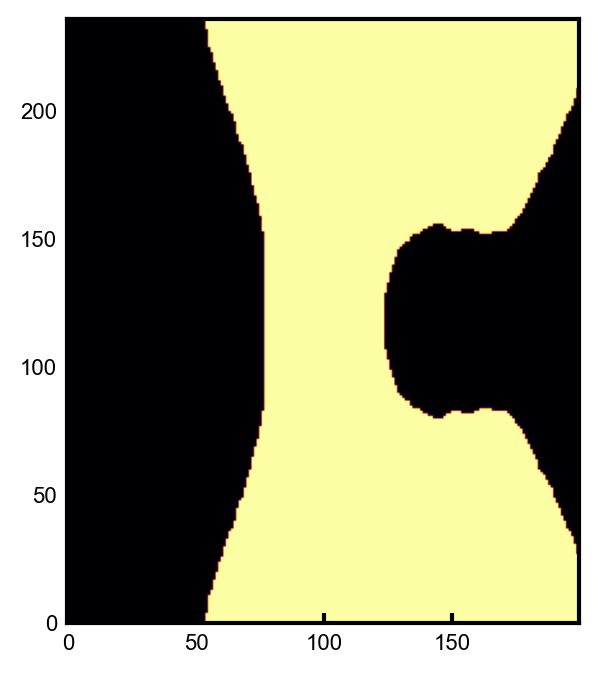

In [102]:
from PIL import Image
from skimage.transform import resize
from skimage.morphology import binary_dilation, binary_erosion
pmg_mask = np.array(Image.open('Public/MAX_WT_PMG_mask.tif'))
cf_mask = np.array(Image.open('Public/MAX_WT_CF_mask.tif'))

pmg_mask = np.array(pmg_mask)
cf_mask = np.array(cf_mask)
total_mask = resize(pmg_mask + cf_mask, (236, 200))
total_mask = (total_mask + total_mask[::-1]) > 0
n = 3
total_mask = ~binary_erosion(total_mask, np.ones([n, n]))
total_mask
print(total_mask.shape)
plt.imshow(total_mask)
np.save('Public/pmg_cf_mask', total_mask)

# Morphodynamic offsets

In [1]:
from utils.dataset import *
transform = Reshape2DField()
cad_dataset = AtlasDataset('WT', 'ECad-GFP', 'velocity2D', transform=transform)
sqh_dataset = AtlasDataset('Halo_Hetero_Twist[ey53]_Hetero', 'Sqh-GFP', 'velocity2D', transform=transform, drop_time=True)

runt_dataset = AtlasDataset('WT', 'Runt', 'velocity2D', transform=transform)
hist_dataset = AtlasDataset('WT', 'histone-RFP', 'velocity2D', transform=transform, drop_time=True)
eve_dataset = AtlasDataset('WT', 'Even_Skipped-YFP', 'velocity2D', transform=transform, drop_time=True)

100%|██████████| 3/3 [00:00<00:00, 13.44it/s]


In [14]:
offsets = pd.DataFrame(columns=['embryoID', 'offset']).set_index('embryoID')

offsets.loc[202006261115, 'offset'] = -1
offsets.loc[202007011145, 'offset'] = 21
offsets.loc[202007081130, 'offset'] = 13
offsets.loc[202007091200, 'offset'] = 21
offsets.loc[202008131005, 'offset'] = 10
offsets.loc[202009041145, 'offset'] = 11
offsets.to_csv('Public/Halo_Hetero_Twist[ey53]_Hetero/Sqh-GFP/morphodynamic_offsets.csv')
sqh_dataset = AtlasDataset('Halo_Hetero_Twist[ey53]_Hetero', 'Sqh-GFP', 'velocity2D', transform=transform, drop_time=True)

offsets = pd.DataFrame(columns=['embryoID', 'offset']).set_index('embryoID')
for eId in cad_dataset.df.embryoID.unique():
    offsets.loc[eId, 'offset'] = 18
offsets.to_csv('Public/WT/ECad-GFP/morphodynamic_offsets.csv')
cad_dataset = AtlasDataset('WT', 'ECad-GFP', 'velocity2D', transform=transform)


offsets = pd.DataFrame(columns=['embryoID', 'offset']).set_index('embryoID')
for eId in runt_dataset.df.embryoID.unique():
    offsets.loc[eId, 'offset'] = 20
offsets.loc[202001210044, 'offset'] -= 5
offsets.loc[202001141943, 'offset'] += 10
offsets.to_csv('Public/WT/Runt/morphodynamic_offsets.csv')
runt_dataset = AtlasDataset('WT', 'Runt', 'velocity2D', transform=transform)

offsets = pd.DataFrame(columns=['embryoID', 'offset']).set_index('embryoID')
offsets.loc[202001201216, 'offset'] = 0
offsets.loc[202001201716, 'offset'] = 23
offsets.to_csv('Public/WT/Even_Skipped-YFP/morphodynamic_offsets.csv')
eve_dataset = AtlasDataset('WT', 'Even_Skipped-YFP', 'velocity2D', transform=transform, drop_time=True)

offsets = pd.DataFrame(columns=['embryoID', 'offset']).set_index('embryoID')
for eId in hist_dataset.df.embryoID.unique():
    offsets.loc[eId, 'offset'] = 23
offsets.loc[20140612184500, 'offset'] -= 7
offsets.loc[20140912174700, 'offset'] += 2
offsets.loc[20140916131600, 'offset'] += 9
offsets.loc[20140917212700, 'offset'] += 14
offsets.to_csv('Public/WT/histone-RFP/morphodynamic_offsets.csv')
hist_dataset = AtlasDataset('WT', 'histone-RFP', 'velocity2D', transform=transform, drop_time=True)

100%|██████████| 5/5 [00:00<00:00, 628.60it/s]


Sqh-GFP
ECad-GFP
Runt
Even_Skipped-YFP
histone-RFP


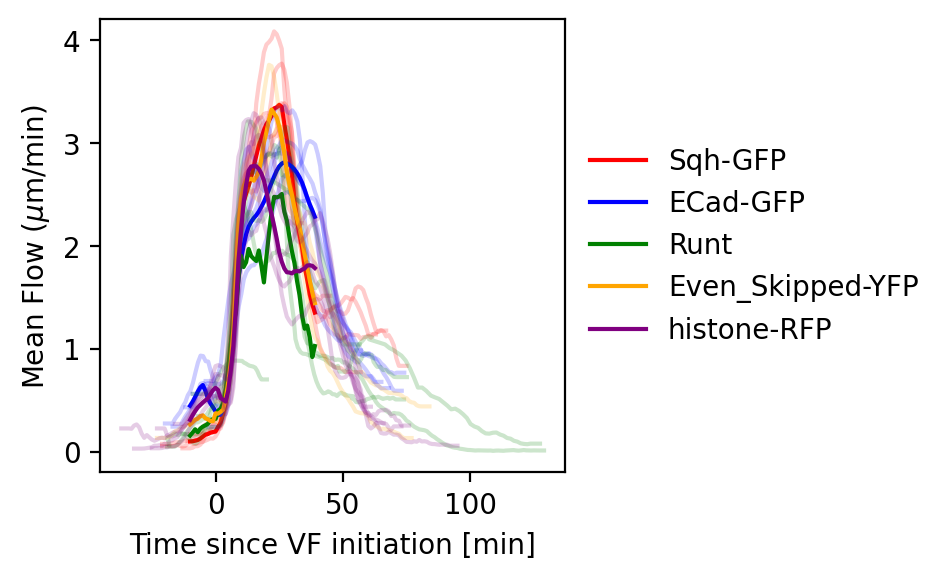

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, dpi=200, figsize=(3, 3))
ax.set_ylabel('Mean Flow ($\\mu$m/min)')
ax.set_ylim([-0.2, 4.2])
ax.set_xlabel('Time since VF initiation [min]')

for dataset, color in zip([sqh_dataset, cad_dataset, runt_dataset, eve_dataset, hist_dataset], 
                          ['red', 'blue', 'green', 'orange', 'purple']):
    for eId in dataset.df.embryoID.unique():
        values = dataset.values[eId]
        time = dataset.df.loc[dataset.df.embryoID == eId, 'time']
        norm = np.linalg.norm(values.reshape([values.shape[0], -1, *values.shape[-2:]]), axis=1).mean(axis=(1, 2))
        if 'Runt' in dataset.label or 'Eve' in dataset.label:
            norm /= 0.2619 / 0.4
        if 'hist' in dataset.label:
            norm *= 0.2619 / 0.4
        ax.plot(time, norm, color=color, alpha=0.2)

    label = '_'.join(os.path.basename(dataset.label).split('_')[:-1])
    print(label)
    ensemble_v = np.load(os.path.join(dataset.path, 'ensemble', 'velocity2D.npy'))
    norm = np.linalg.norm(ensemble_v, axis=(1)).mean(axis=(1, 2))
    ensemble_t = np.load(os.path.join(dataset.path, 'ensemble', 't.npy'))
    if 'Runt' in dataset.label or 'Eve' in dataset.label:
        norm /= 0.2619 / 0.4
    if 'hist' in dataset.label:
        norm *= 0.2619 / 0.4    
    ax.plot(ensemble_t, norm, color=color, label=label)

ax.legend(loc='center left', bbox_to_anchor=[1, 0.5], framealpha=0)

#ax.set_xlim([-10, 40])
        
fig.subplots_adjust(hspace=0)

# Create SVD models

In [7]:
from utils.dataset import *
from torchvision.transforms import Compose
from atlas_processing.anisotropy_detection import cell_size
transform = Reshape2DField()
cad_dataset = AtlasDataset('WT', 'ECad-GFP', 'cyt2D', transform=Compose([transform, Smooth2D(sigma=cell_size)]))
cadRaw_dataset = AtlasDataset('WT', 'ECad-GFP', 'raw2D', transform=Compose([transform, Smooth2D(sigma=7)]))
cad_vel_dataset = AtlasDataset('WT', 'ECad-GFP', 'velocity2D', transform=transform)

sqh_dataset = AtlasDataset('Halo_Hetero_Twist[ey53]_Hetero', 'Sqh-GFP', 'tensor2D', transform=transform, drop_time=True)
sqh_vel_dataset = AtlasDataset('Halo_Hetero_Twist[ey53]_Hetero', 'Sqh-GFP', 'velocity2D', transform=transform, drop_time=True)

runt_dataset = AtlasDataset('WT', 'Runt', 'raw2D', transform=Compose([transform, Smooth2D(sigma=1)]))
hist_dataset = AtlasDataset('WT', 'histone-RFP', 'raw2D', transform=Compose([transform, Smooth2D(sigma=0.5)]), drop_time=True,)
eve_dataset = AtlasDataset('WT', 'Even_Skipped', 'raw2D', transform=Compose([transform, Smooth2D(sigma=1)]), drop_time=True)

100%|██████████| 1/1 [00:00<00:00, 182.02it/s]


In [6]:
from utils.decomposition_utils import *
pmg_cf_mask = np.load('Public/Masks/pmg_cf_mask.npy')
cad_info = get_decomposition_results(cadRaw_dataset, overwrite=True, crop=10, model_name='SVDPipeline_PMG_CF', mask=pmg_cf_mask)
cad_info = get_decomposition_results(cadRaw_dataset, overwrite=True, crop=10)

Building new SVDPipeline for this dataset
Building new SVDPipeline for this dataset


In [108]:
from utils.decomposition_utils import *
runt_info = get_decomposition_results(runt_dataset, overwrite=True, crop=10, lrsym=False)
hist_info = get_decomposition_results(hist_dataset, overwrite=True, crop=10, lrsym=False)
eve_info = get_decomposition_results(eve_dataset, overwrite=True, crop=10, lrsym=False)

Building new SVDPipeline for this dataset
Building new SVDPipeline for this dataset
Building new SVDPipeline for this dataset


In [2]:
from utils.decomposition_utils import *

pmg_cf_mask = np.load('Public/Masks/pmg_cf_mask.npy')


sqh_info = get_decomposition_results(sqh_dataset, overwrite=True, crop=10, model_name='SVDPipeline_PMG_CF', mask=pmg_cf_mask)
sqh_info = get_decomposition_results(sqh_dataset, overwrite=True, crop=10)

cad_info = get_decomposition_results(cad_dataset, overwrite=True, crop=10, model_name='SVDPipeline_PMG_CF', mask=pmg_cf_mask)
cad_info = get_decomposition_results(cad_dataset, overwrite=True, crop=10)

cad_vel_info = get_decomposition_results(cad_vel_dataset, overwrite=True, crop=10)
sqh_vel_info = get_decomposition_results(sqh_vel_dataset, overwrite=True, crop=10)

#runt_info = get_decomposition_results(runt_dataset, overwrite=True, crop=10, model_name='SVDPipeline_PMG_CF', mask=pmg_cf_mask)
#runt_info = get_decomposition_results(runt_dataset, overwrite=True, crop=10)

Building new SVDPipeline for this dataset
Building new SVDPipeline for this dataset
Building new SVDPipeline for this dataset
Building new SVDPipeline for this dataset
Building new SVDPipeline for this dataset
Building new SVDPipeline for this dataset


# Visualize library terms

0.09592747585483975 0.15143917408436805
(78, 2, 2, 216, 135) (78, 2, 216, 135) (78, 2, 2, 216, 135)
0.029463373977059473 0.007592336598395583 -7.473474665265713e-05


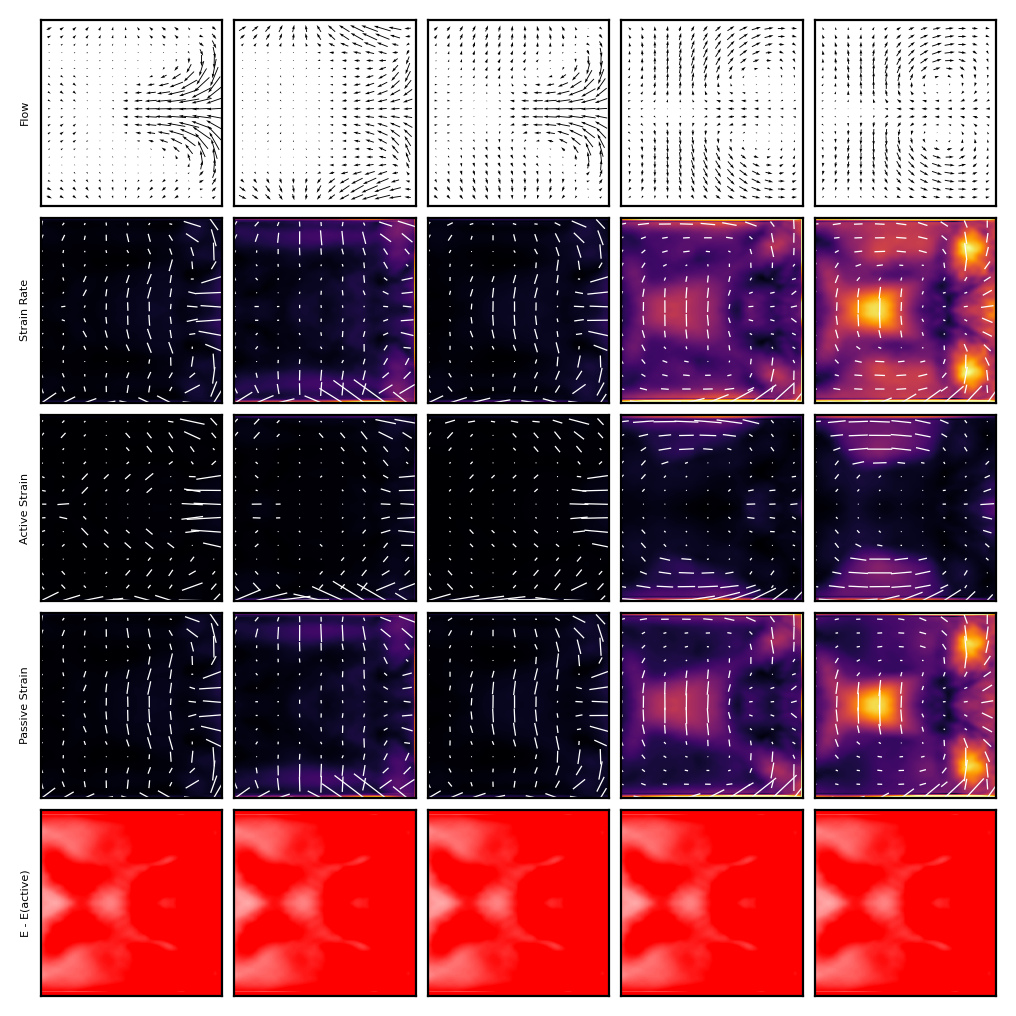

In [1]:
from math import ceil
from utils.plot_utils import *
import pickle as pk
import h5py

traj = 0
tts = [0, 10, 20, 30, 40]
skip = 16
plt.rcParams['font.size'] = 4
plt.rcParams['image.origin'] = 'lower'
plt.rcParams['image.cmap'] = 'inferno'

model = pk.load(open('data/WT/ECad-GFP/decomposition_models/cyt_SVDPipeline_PMG_CF.pkl', 'rb'))
mask = model['masker'].mask_
ys, xs = np.where(mask!=0) 
crop_mask = np.s_[..., min(ys):max(ys)+1, min(xs):max(xs)+1]
mask = mask[crop_mask]

fig, ax = plt.subplots(5, len(tts), dpi=200, figsize=(len(tts), 5))

with h5py.File('data/symmetric_dynamics_fitting.h5', 'r') as h5f:
    embryoID = 'ensemble'
    lib = h5f['202001280915']
    fields = lib['fields']
    
    m = fields['m_ij'][crop_mask][()]
    mnorm = np.linalg.norm(m, axis=(1, 2))
    mmin = mnorm.mean()
    mmax = mnorm.max()
    
    print(mmin, mmax)

    v = fields['v'][crop_mask][()]
    
    E = lib['links']['v']['tensor_library']['E'][crop_mask][()]
    
    E_mag = np.linalg.norm(E, axis=(1, 2))
    emin = E_mag.min()
    emax = emin + 3 * E_mag.std()
    
    print(E.shape, v.shape, m.shape)
        
    deviatoric = m - 0.5 * np.einsum('bkkyx,ij->bijyx', m, np.eye(2))
    
    m0 = np.linalg.norm(m, axis=(1, 2), keepdims=True).mean(axis=(3, 4), keepdims=True)
    dev_mag = np.linalg.norm(deviatoric, axis=(1, 2), keepdims=True)
        
    devE = np.einsum('bklyx,bklyx->byx', deviatoric, E)[:, None, None]
    
    E_active = E - np.sign(devE) * devE * deviatoric / dev_mag**2
    E_active = 0.5 * E_active * dev_mag / m0
    
    E_passive = E - E_active
    
    E_a_mag = np.linalg.norm(E_active, axis=(1, 2))
    
    E_proj_a = np.einsum('bklyx,bklyx->byx', E_active, E)[:, None, None] * E_active / E_a_mag[:, None, None]**2
    E_proj_a_mag = np.linalg.norm(E_proj_a, axis=(1, 2))
    
    print(E_mag.mean(), E_a_mag.mean(), E_proj_a.mean())
        
    #m[..., ~mask] = np.nan
    #v[..., ~mask] = np.nan
    #E[..., ~mask] = np.nan
    #E_passive[..., ~mask] = np.nan
    #E_active[..., ~mask] = np.nan
    
    kwargs = dict(vmin=mmin, vmax=mmax, skip=skip)
    ewargs = dict(vmin=emin, vmax=emax, skip=skip)
    
    for i, tt in enumerate(tts):
        ti = np.argmin(np.abs(lib['t'][()] - tt))
        plot_vector2D(ax[0, i], v[ti])
        plot_tensor2D(ax[1, i], E[ti], **ewargs)
        plot_tensor2D(ax[2, i], E_active[ti], **ewargs)
        plot_tensor2D(ax[3, i], E_passive[ti], **ewargs)
        #color_2D(ax[4, i], E_mag[ti] - E_a_mag[ti], vmin=-emax, vmax=emax, cmap='bwr')
        color_2D(ax[4, i], E_proj_a_mag - E_a_mag, cmap='bwr', vmin=-emax, vmax=emax)

        
    ax[0, 0].set_ylabel('Flow')
    ax[1, 0].set_ylabel('Strain Rate')
    ax[2, 0].set_ylabel('Active Strain')
    ax[3, 0].set_ylabel('Passive Strain')
    ax[4, 0].set_ylabel('E - E(active)')
    

    for a in ax.flatten():
        a.set_aspect('auto')
    
    plt.tight_layout()

{'m_ij': 0.12158953709520759, 'v': 1.405064889330702, 'c': 1.9264380660144798}


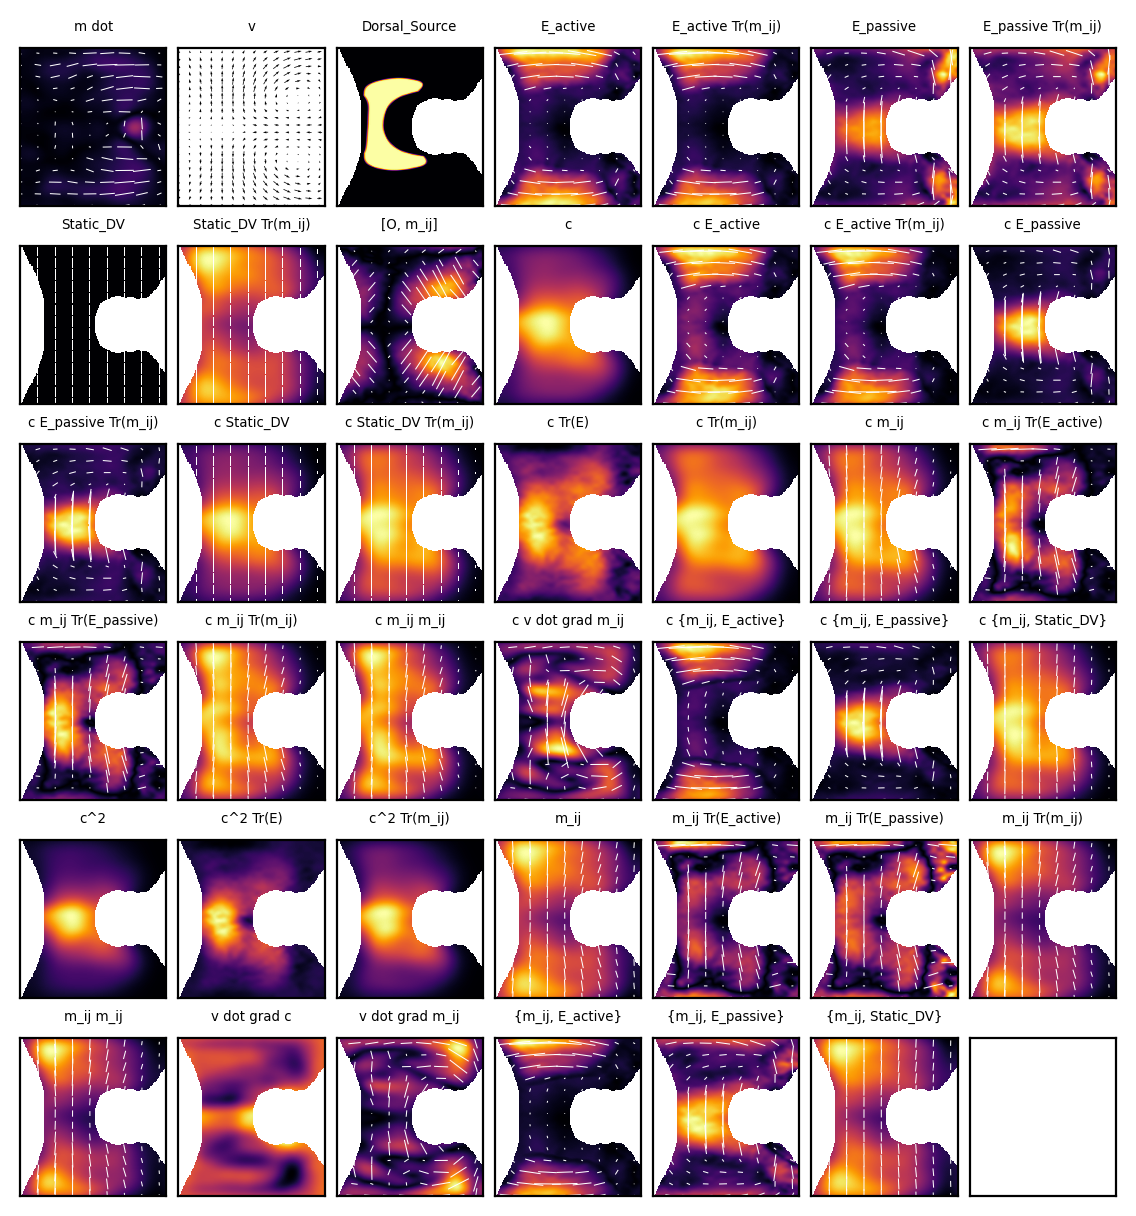

In [5]:
from math import ceil
from utils.plot_utils import *

traj = 0
tt = 35
skip = 16
plt.rcParams['font.size'] = 4
plt.rcParams['image.origin'] = 'lower'
plt.rcParams['image.cmap'] = 'inferno'

model = pk.load(open('data/WT/ECad-GFP/decomposition_models/cyt_SVDPipeline_PMG_CF.pkl', 'rb'))
mask = model['masker'].mask_
ys, xs = np.where(mask!=0) 
crop_mask = np.s_[..., min(ys):max(ys)+1, min(xs):max(xs)+1]
mask = mask[crop_mask]

with h5py.File('data/symmetric_dynamics_fitting.h5', 'r') as h5f:
    embryoID = 'ensemble'
    lib = h5f[embryoID]
    fields = lib['fields']
    ti = np.argmin(np.abs(lib['t'][()] - tt))
    
    means = {
        'm_ij': np.linalg.norm(fields['m_ij'], axis=(1, 2)).mean(),
        'v': np.linalg.norm(fields['v'], axis=1).mean(),
        'c': np.mean(fields['c'])
    }
    print(means)
    keys = list(lib['X_raw'].keys()) #+ list(lib['U_raw'].keys())
    n_plots = 2 + len(keys)

    n_cols = 7
    n_rows = ceil(n_plots / n_cols)
    fig, ax = plt.subplots(n_rows, n_cols, 
                       figsize=(.8*n_cols, n_rows),
                       sharey=True, sharex=True, dpi=200)

    m_dot = lib['X_dot/m_ij'][..., 0][ti][crop_mask]
    m = fields['m_ij'][crop_mask]
    mnorm = np.linalg.norm(m, axis=(1, 2))[:, mask]
    vmin = mnorm.min()
    vmax = mnorm.max()
    
    ax = ax.flatten()
    ax[0].set_title('m dot')
    plot_tensor2D(ax[0], m_dot, vmin=0, vmax=np.std(mnorm), skip=skip)
    ax[0].set_aspect('auto')
    
    ax[1].set_title('v')
    plot_vector2D(ax[1], lib['fields/v'][ti][()][crop_mask])
    
    raw = lib['X_raw']
    for i, key in enumerate(keys):
        feat = lib['X_raw'][key][ti][crop_mask]
        feat[..., ~mask] = np.nan
        
        if lib['X_raw'][key].attrs['space'] > 0:
            kwargs = dict(vmin=0, vmax=np.std(mnorm))
        else:
            kwargs = dict(vmin=vmin, vmax=vmax)
        
        if len(lib['X_raw'][key].shape) == 3:            
            color_2D(ax[i+2], feat)
        else:
            fnorm = np.linalg.norm(feat, axis=(0, 1))[..., mask]
            plot_tensor2D(ax[i+2], feat[()], skip=skip, linewidth=0.007)
        ax[i+2].set_title(key)
        ax[i+2].set_aspect('auto')

    plt.tight_layout()